<a href="https://colab.research.google.com/github/harshadasari451/Binary-Prediction-with-a-Rainfall-Dataset/blob/main/kaggle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
!ls

kaggle.json  train.csv	Untitled0.ipynb


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [ ]:
df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [ ]:
df.drop(['id', 'day'], axis=1, inplace=True)

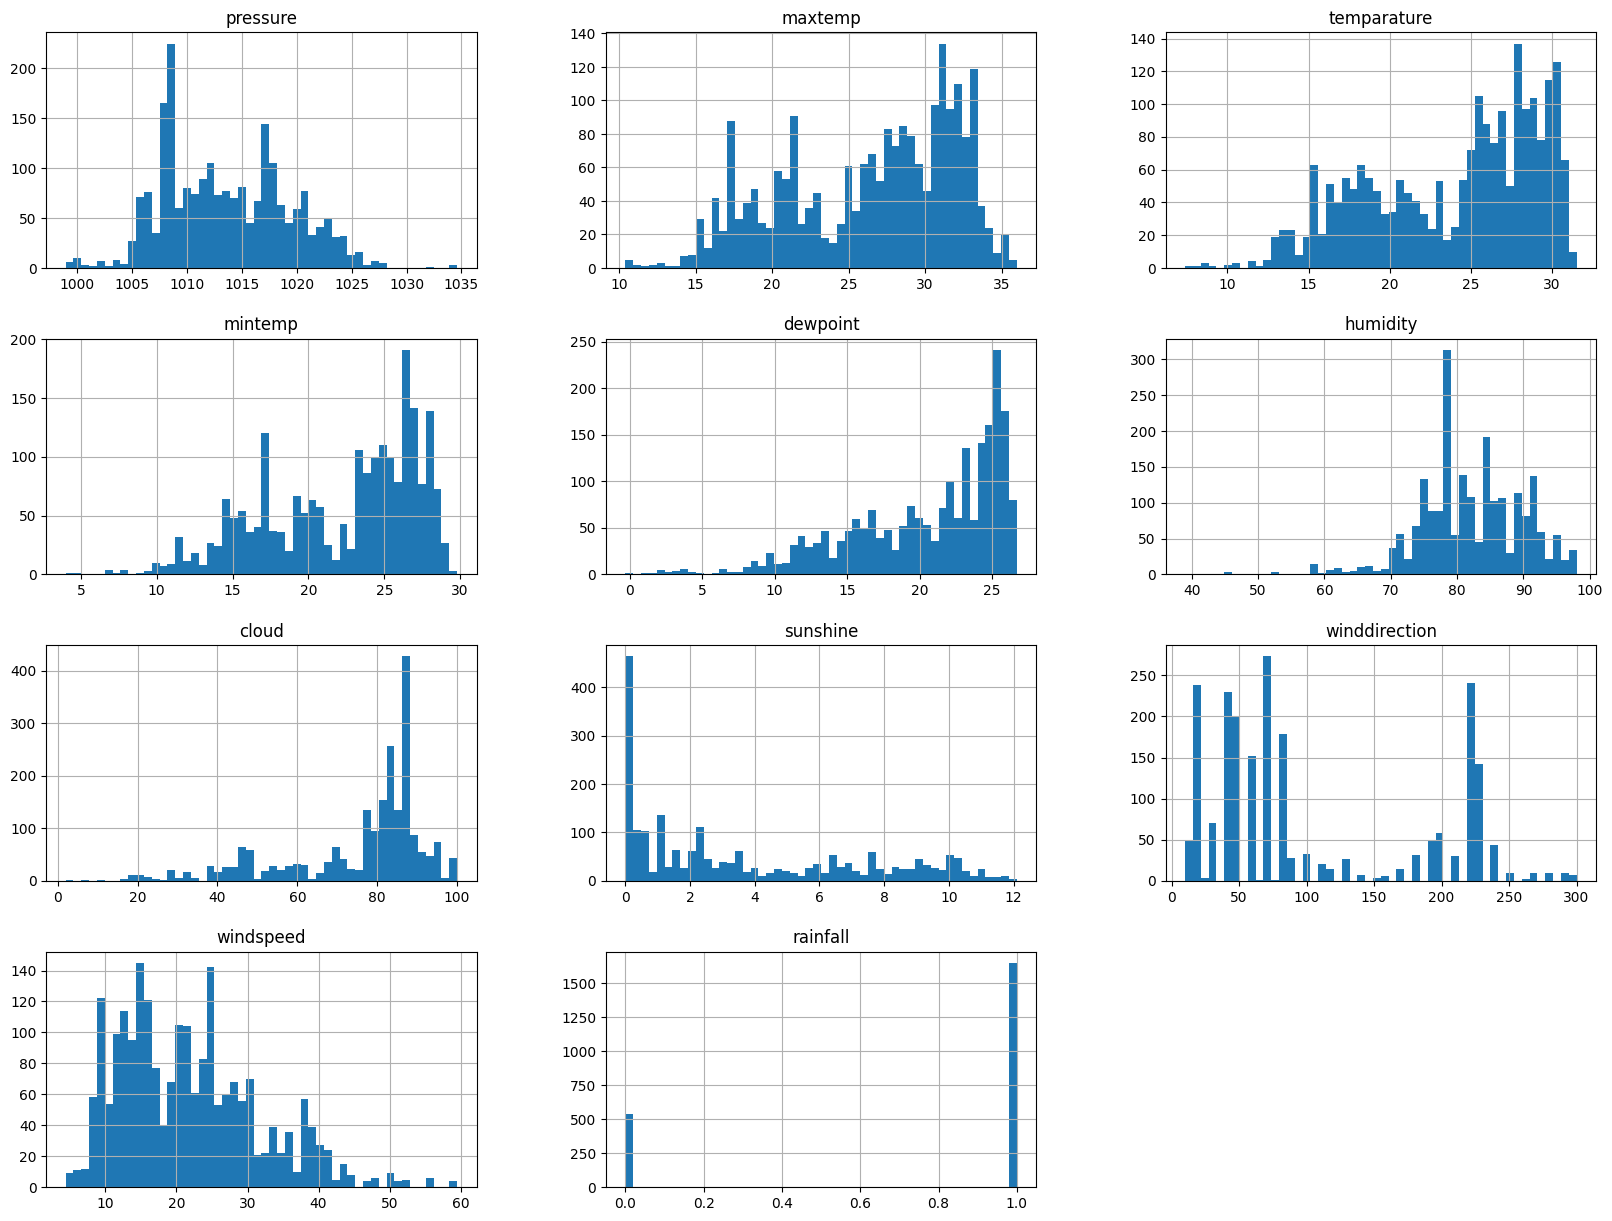

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix['rainfall'].sort_values(ascending=False)

,rainfall
rainfall,1.000000
cloud,0.641191
humidity,0.454213
windspeed,0.111625
dewpoint,0.081965
winddirection,-0.006939
mintemp,-0.026841
temparature,-0.049660
pressure,-0.049886
maxtemp,-0.079304


In [ ]:
y = df['rainfall']
x = df[['cloud','humidity','sunshine']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model.score(x_train, y_train)

0.8641552511415526

In [ ]:
model.score(x_val, y_val)

0.8333333333333334

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(model,x_val,y_val)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

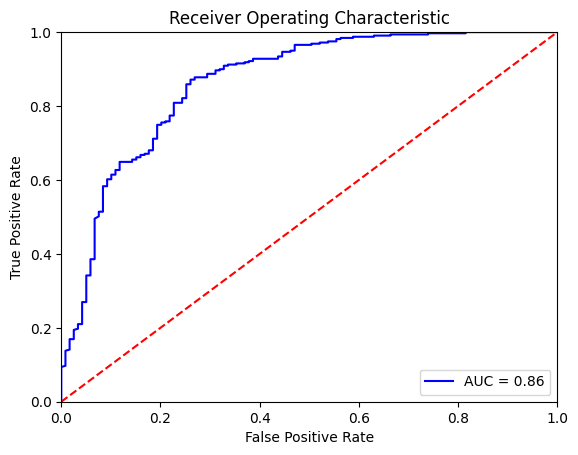

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: roc_auc_score
# from sklearn.metrics import roc_auc_score
# y_pred_proba = model.predict_proba(x_val)[::,1]
# auc = roc_auc_score(y_val, y_pred_proba)
# print("AUC for our sample data is: ", auc)

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [ ]:
x_test = df_test[['cloud','humidity','sunshine']]

In [ ]:
te = df_test[['id']]

In [ ]:
print(len(x_test))

730


In [ ]:
import numpy as np
test_preds = model.predict(x_test).flatten()

if np.isnan(test_preds).sum() > 0:
    print(f"Found {np.isnan(test_preds).sum()} NaN values in predictions. Fixing them...")
    # test_preds = np.nan_to_num(test_preds)

In [ ]:
submission = pd.DataFrame({"id": te['id'], "rainfall": test_preds})
submission.to_csv("submission.csv", index=False)

print("Successfully Saved Raaaaaaahhhhhh!!!")

Successfully Saved Raaaaaaahhhhhh!!!


In [ ]:
list = []
for i in range(len(x_test)):
  x_test['id'][i] = i